In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from category_encoders import *

In [277]:
data = pd.read_csv("churn123.txt")
data.head(10)

,ID,LONGDIST,International,LOCAL,DROPPED,PAY_MTHD,LocalBillType,LongDistanceBillType,AGE,SEX,STATUS,CHILDREN,Est_Income,Car_Owner,CHURNED,train
0,0,5.246400,7.51510,86.32780,0,'CH','FreeLocal','Standard',57,'F','M',2,27535.30,'Y','Vol',1
1,3,0.000000,0.00000,3.94229,0,'CC','Budget','Intnl_discount',50,'F','S',2,64632.30,'N','InVol',2
2,4,5.555640,0.00000,9.36347,1,'CC','Budget','Intnl_discount',68,'F','M',2,81000.90,'N','Vol',1
3,8,14.019300,5.68043,29.80650,0,'CC','Budget','Standard',34,'M','S',0,87467.10,'Y','Current',1
4,10,13.664000,2.95642,32.63810,0,'CC','FreeLocal','Intnl_discount',60,'M','M',2,83220.60,'N','Vol',1
5,11,0.000000,0.00000,1.41294,0,'CC','FreeLocal','Standard',84,'F','S',0,50290.70,'N','InVol',3
6,13,0.281029,0.00000,8.53692,0,'CH','Budget','Intnl_discount',28,'F','M',2,20850.40,'N','Vol',1
7,17,1.577000,0.00000,19.98080,0,'CC','FreeLocal','Standard',52,'M','S',0,84112.60,'N','Current',1
8,19,11.030700,0.00000,34.27770,0,'CC','Budget','Standard',87,'F','S',2,3776.12,'N','Vol',3
9,20,0.452629,0.00000,73.01220,0,'Auto','FreeLocal','Standard',88,'F','M',2,73865.90,'Y','Vol',1


In [278]:
data['Leaver'] = data['CHURNED'].apply(lambda x: 'T' if x == "'Vol'" else 'F')

In [279]:
from sklearn.preprocessing import normalize
X = data.drop(["ID","CHURNED","Leaver"],1)
enc = BinaryEncoder(cols=['PAY_MTHD','LocalBillType','LongDistanceBillType','SEX','STATUS','Car_Owner']).fit(X)
X = enc.transform(X)

In [280]:
nor_X = normalize(X.drop(["train"],1).select_dtypes(include=[np.number]))
y = data["Leaver"].values

In [281]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,random_state=0,init='random')
clustering = kmeans.fit_predict(nor_X)

In [282]:
X['Cluster'] = clustering

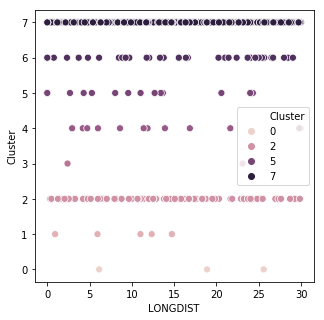

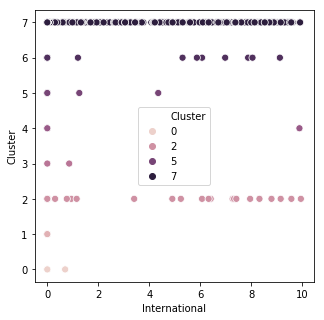

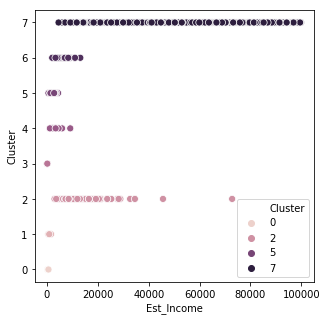

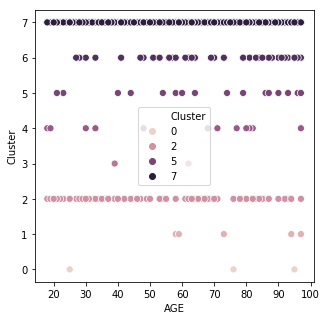

In [283]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X['LONGDIST'], 
                y=X['Cluster'],
                hue='Cluster', # different colors by group
                s=50, data=X)
plt.show()
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X['International'], 
                y=X['Cluster'],
                hue='Cluster', # different colors by group
                s=50, data=X)
plt.show()
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X['Est_Income'], 
                y=X['Cluster'],
                hue='Cluster', # different colors by group
                s=50, data=X)
plt.show()
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X['AGE'], 
                y=X['Cluster'],
                hue='Cluster', # different colors by group
                s=50, data=X)
plt.show()

In [284]:
from sklearn.metrics import silhouette_score, silhouette_samples
sil_score = silhouette_score(X,X['Cluster'], metric='euclidean')
sil_score

0.13691687594955831

In [293]:
for i in range(2,15):
    print("=============== k=",i,"===============")
    kmeans = KMeans(n_clusters=i,random_state=0,init='random')
    clustering = kmeans.fit_predict(nor_X)
    sil_score = silhouette_score(X,clustering, metric='euclidean')    
    print(sil_score)

=============== k= 2 ===============
0.19349810643982032
=============== k= 3 ===============
0.19403306460588954
=============== k= 4 ===============
0.1914833680512972
=============== k= 5 ===============
0.19614307837567369
=============== k= 6 ===============
0.1844981742454312
=============== k= 7 ===============
0.18060386276632806
=============== k= 8 ===============
0.13691687594955831
=============== k= 9 ===============
0.13064145980688552
=============== k= 10 ===============
0.11330409008279688
=============== k= 11 ===============
0.10282230387946999
=============== k= 12 ===============
-0.020975529643088527
=============== k= 13 ===============
-0.05192992805334794
=============== k= 14 ===============
0.0007347579282299646
